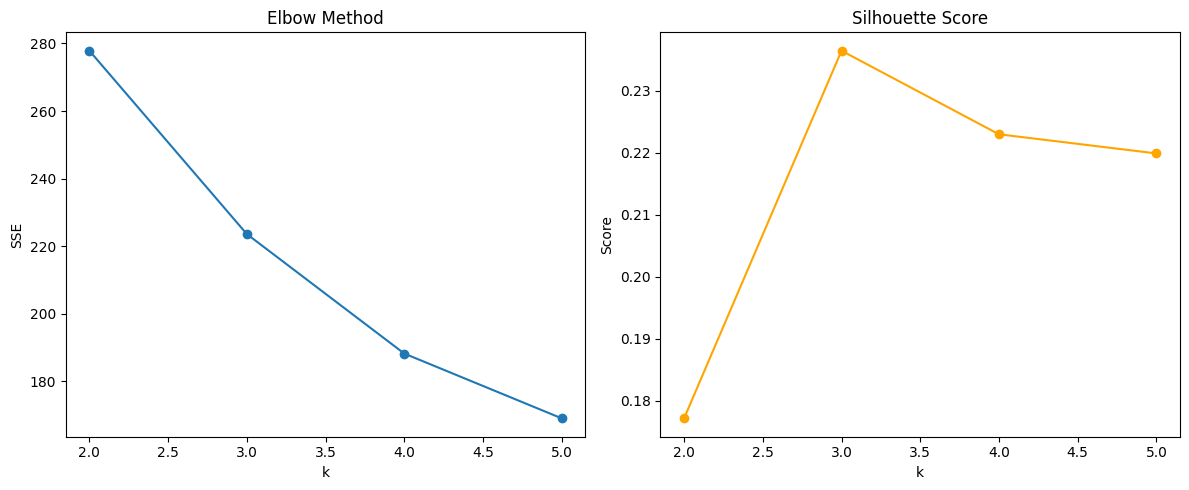

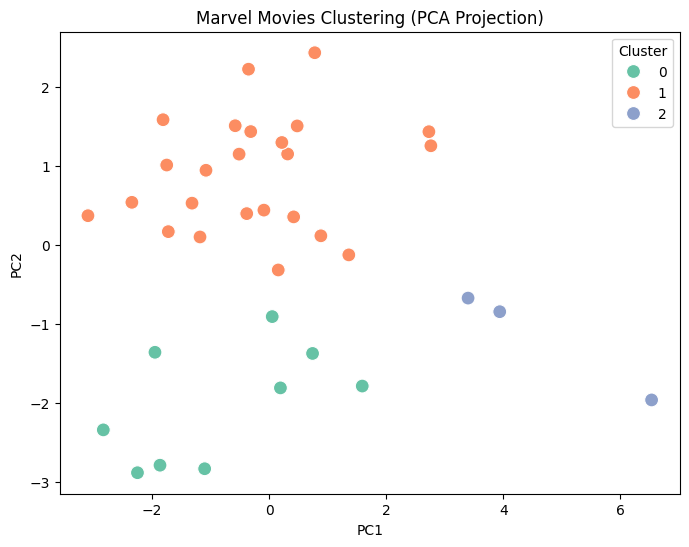


Cluster 0 examples:
                            movie  year      category  worldwide_gross
          Avengers: Age of Ultron  2015      Avengers             1395
                  Black Panther 2  2022 Black Panther              855
                      Black Widow  2021        Unique              379
Dr Strange: Multiverse of Madness  2022    Dr Strange              952
                         Eternals  2021        Unique              402

Cluster 1 examples:
                     movie  year        category  worldwide_gross
                 Ant-Man    2015         Ant-Man              518
        Ant-Man & The Wasp  2018         Ant-Man              623
             Black Panther  2018   Black Panther             1336
           Captain America  2011 Captain America              370
Captain America: Civil War  2016 Captain America             1151

Cluster 2 examples:
                  movie  year   category  worldwide_gross
     Avengers: End Game  2019   Avengers             2797

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("Marvel Movies.csv")

# --- STEP 1: Clean and prepare data ---
# Strip '%' signs and convert relevant columns to numeric
percent_cols = ['% budget recovered', 'critics % score', 'audience % score',
                'audience vs critics % deviance', '1st vs 2nd weekend drop off',
                '% gross from opening weekend', '% gross from domestic',
                '% gross from international', '% budget opening weekend']

for col in percent_cols:
    if df[col].dtype == 'object':  # Only apply .str.replace if the column is string
        df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Rename for clarity
df.rename(columns={
    'worldwide gross ($m)': 'worldwide_gross',
    'budget': 'budget_m',
    'opening weekend ($m)': 'opening_weekend',
    'second weekend ($m)': 'second_weekend'
}, inplace=True)

# Select features for clustering
features = [
    'year',
    'worldwide_gross',
    '% budget recovered',
    'critics % score',
    'audience % score',
    'audience vs critics % deviance',
    'budget_m',
    'opening_weekend',
    'second_weekend',
    '1st vs 2nd weekend drop off'
]

X = df[features].dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- STEP 2: Determine optimal k ---
sse = []
silhouette_scores = []
k_range = range(2, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# --- STEP 3: Final Clustering ---
k_optimal = 3  # Based on silhouette/visual elbow
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- STEP 4: Visualize Clusters ---
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)
df['PC1'] = pca_coords[:, 0]
df['PC2'] = pca_coords[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title("Marvel Movies Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

# --- STEP 5: Describe clusters ---
for i in range(k_optimal):
    print(f"\nCluster {i} examples:")
    print(df[df['Cluster'] == i][['movie', 'year', 'category', 'worldwide_gross']].head(5).to_string(index=False))

# Optional: Export the clustered dataset
df.to_csv("clustered_marvel_movies.csv", index=False)


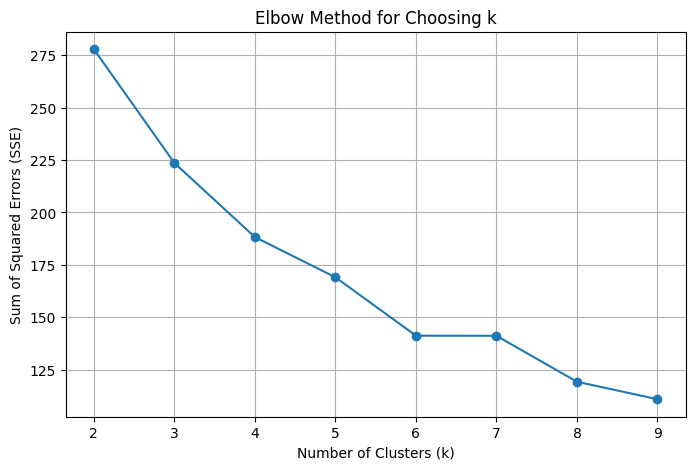


Cluster 0 sample movies:
                  movie  year      category  worldwide_gross  budget_m  critics % score
Avengers: Age of Ultron  2015      Avengers             1395     365.0               76
        Black Panther 2  2022 Black Panther              855     250.0               84
            Black Widow  2021        Unique              379     200.0               79

Cluster 1 sample movies:
             movie  year      category  worldwide_gross  budget_m  critics % score
         Ant-Man    2015       Ant-Man              518     130.0               83
Ant-Man & The Wasp  2018       Ant-Man              623     130.0               87
     Black Panther  2018 Black Panther             1336     200.0               96

Cluster 2 sample movies:
                  movie  year   category  worldwide_gross  budget_m  critics % score
     Avengers: End Game  2019   Avengers             2797     400.0               94
 Avengers: Infinity War  2018   Avengers             2048     300.0 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("Marvel Movies.csv")

# Clean and prepare data
# Define percentage-based columns
percent_cols = ['% budget recovered', 'critics % score', 'audience % score',
                'audience vs critics % deviance', '1st vs 2nd weekend drop off',
                '% gross from opening weekend', '% gross from domestic',
                '% gross from international', '% budget opening weekend']

# Clean percentage columns
for col in percent_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Rename columns
df.rename(columns={
    'worldwide gross ($m)': 'worldwide_gross',
    'budget': 'budget_m',
    'opening weekend ($m)': 'opening_weekend',
    'second weekend ($m)': 'second_weekend'
}, inplace=True)

# Select/scale features
features = [
    'year',
    'worldwide_gross',
    '% budget recovered',
    'critics % score',
    'audience % score',
    'audience vs critics % deviance',
    'budget_m',
    'opening_weekend',
    'second_weekend',
    '1st vs 2nd weekend drop off'
]

X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Elbow Method
sse = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

#Apply clustering
k_optimal = 3  # Adjust based on Elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#Print from each cluster
for i in range(k_optimal):
    print(f"\nCluster {i} sample movies:")
    print(df[df['Cluster'] == i][['movie', 'year', 'category', 'worldwide_gross', 'budget_m', 'critics % score']].head(3).to_string(index=False))

